# PET-CT Registration Practice

## Purpose of This Practice
- Study **dicom** Medical Image Files.
- Experience real **PET-CT** dataset.

### RIDER Lung PET-CT Dataset
##### Reference : https://wiki.cancerimagingarchive.net/display/Public/RIDER+Lung+PET-CT#225127500af19c1c2e444b1abb1cc196e52abae6

# I. Data Preprocessing
## Contents
0. Import / Setup
1. PET-CT Metadata Preprocessing
2. Data Selection
3. Voxel Generation

## 0. Import / Setup

In [1]:
import os, sys
import shutil
import math
from tqdm.notebook import tqdm
import time
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom

In [2]:
# PATH Setting
DISK_PATH = 'D:\\'
META_PATH = 'manifest-TWT4rfni3436550357686601184'
DIR_PATH = os.path.join(DISK_PATH, META_PATH)
print (DIR_PATH)

D:\manifest-TWT4rfni3436550357686601184


## 1. PET-CT Metadata Preprocessing

### 1) Data Loading

In [148]:
metadata = pd.read_csv(DIR_PATH + '/metadata.csv')
metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.9328.50.17.21539635004042802696358...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,CT 2.5mm cb03,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,64,32.12 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:33:13.717
1,1.3.6.1.4.1.9328.50.17.24674249575175155363249...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,3D FBP H10 cb03,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.59 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:31:39.064
2,1.3.6.1.4.1.9328.50.17.14298831690972470748724...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,5min 3D OSEM 8it28sub 10MM cb03,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.59 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:31:39.064
3,1.3.6.1.4.1.9328.50.17.33448411630762243528802...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,5min 3D OSEM 8it28sub 7MM cb03,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.59 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:31:45.154
4,1.3.6.1.4.1.9328.50.17.13157237625811298431135...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1006487867,1.3.6.1.4.1.9328.50.17.10616571986483711586653...,Unspecified CT,06-29-2006,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,2,4.35 MB,.\RIDER Lung PET-CT\RIDER-1006487867\06-29-200...,2021-07-07T21:31:52.929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1.3.6.1.4.1.9328.50.17.29526182708906873966519...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT SCOUT HEAD IN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,2,4.97 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:43:11.042
1324,1.3.6.1.4.1.9328.50.17.27647997212178938595947...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,AC for PET,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,429,215.30 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:45:15.912
1325,1.3.6.1.4.1.9328.50.17.29196707572056236162490...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,70CM FOV 3.27MM CT STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,739,370.88 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:56:04.11
1326,1.3.6.1.4.1.9328.50.17.10888495592818845871887...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,267,9.08 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:34:45.372


In [149]:
# Sorting
metadata = metadata.sort_values(by=['Subject ID', 'Study UID'])

### 2) Check PET-CT Pair Datas

In [103]:
def checkPETandCT(df):
    output = []
    for idx in df.groupby(['Subject ID', 'Study UID']).count()['Modality'].index:
        value = (df[['Subject ID', 'Study UID']] == idx).values
        grid = (value[:,0] == value[:,1]) == (value[:,0] == True)
        mods = df.loc[grid, :]['Modality'].values
        bools = 'CT' in mods and 'PT' in mods
        for loc in df.loc[grid, :]['File Location']:
            output.append(bools)
    return output

In [105]:
check_petct = checkPETandCT(metadata)
print (len(check_petct))

1328


### 3) Delete Other Datas

In [175]:
def delete_dir(df, check, DIR_PATH):
    for i, bools in enumerate(check, 0):
        if not bools:
            ABS_PATH = DIR_PATH + df['File Location'][i][1:]
            META_PATH = os.path.join(ABS_PATH, os.pardir)
            try:
                shutil.rmtree(ABS_PATH)
            except: pass
            try: os.rmdir(META_PATH)
            except: pass
            try: os.rmdir(os.path.join(META_PATH, os.pardir))
            except: pass
    print('Delete Checked Directories Clearly.')

In [176]:
delete_dir(metadata, check_petct, DIR_PATH)

Delete Checked Directories Clearly.


### 4) Save Preprocessed Metadata

In [211]:
new_metadata = metadata[check_petct]
new_metadata.to_csv(DIR_PATH + '/new_metadata.csv', na_rep='null')

In [218]:
# Validation
def count_folder(DIR_PATH):
    count = 0
    for PATH_1 in os.listdir(DIR_PATH + '/RIDER Lung PET-CT')[1:]:
        for PATH_2 in os.listdir(DIR_PATH + '/RIDER Lung PET-CT/'+ PATH_1):
            count += len(os.listdir(DIR_PATH + '/RIDER Lung PET-CT/'+ PATH_1+'/'+PATH_2))
    return count

print ("Patient Number")
print ("Metadata:", len(new_metadata.groupby(['Subject ID']).size().index))
print ("Folder  :", len(os.listdir(DIR_PATH + '/RIDER Lung PET-CT'))-1)
print ("")
print ("Series Number")
print ("Metadata:", len(new_metadata))
print ("Folder  :", count_folder(DIR_PATH))

Patient Number
Metadata: 93
Folder  : 93

Series Number
Metadata: 828
Folder  : 828


## 2. Data Selection

### 1) Delete Strange Data
#### Procedure
1. Make dataframe with possible cases.
2. Check data with 3D Slicer Program.
3. Delete strange datas.

In [9]:
# Load new_metadata if needed
new_metadata = pd.read_csv(DIR_PATH + '/new_metadata.csv', index_col=0)

In [263]:
sel_metadata = dict()
sel_metadata['First'] = new_metadata.reset_index()
sel_metadata['First']

,index,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,0,1.3.6.1.4.1.9328.50.17.21539635004042802696358...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,CT 2.5mm cb03,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,64,32.12 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:33:13.717
1,1,1.3.6.1.4.1.9328.50.17.24674249575175155363249...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,3D FBP H10 cb03,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.59 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:31:39.064
2,2,1.3.6.1.4.1.9328.50.17.14298831690972470748724...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,5min 3D OSEM 8it28sub 10MM cb03,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.59 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:31:39.064
3,3,1.3.6.1.4.1.9328.50.17.33448411630762243528802...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1002189179,1.3.6.1.4.1.9328.50.17.74928344181377977351227...,NaN,05-07-2006,5min 3D OSEM 8it28sub 7MM cb03,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.59 MB,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...,2021-07-07T21:31:45.154
4,10,1.3.6.1.4.1.9328.50.17.10979049634014230470074...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1009463841,1.3.6.1.4.1.9328.50.17.17116950301501248436577...,NaN,05-07-2006,CT 2.5mm cb02,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,65,32.62 MB,.\RIDER Lung PET-CT\RIDER-1009463841\05-07-200...,2021-07-07T21:40:08.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1323,1.3.6.1.4.1.9328.50.17.29526182708906873966519...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT SCOUT HEAD IN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,2,4.97 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:43:11.042
824,1324,1.3.6.1.4.1.9328.50.17.27647997212178938595947...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,AC for PET,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,429,215.30 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:45:15.912
825,1325,1.3.6.1.4.1.9328.50.17.29196707572056236162490...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,70CM FOV 3.27MM CT STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,739,370.88 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:56:04.11
826,1326,1.3.6.1.4.1.9328.50.17.10888495592818845871887...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,267,9.08 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:34:45.372


#### a. slice < 10

In [223]:
# Check Data with (# of .dcm) < 10
min_df = new_metadata.loc[new_metadata['Number of Images']<10, ['Subject ID', 'Study Description', 'Study Date', 'Series Description', 'Modality', 'Number of Images', 'File Location']]
min_df.to_csv(DIR_PATH + '/min_df.csv', na_rep='null')
min_df

,Subject ID,Study Description,Study Date,Series Description,Modality,Number of Images,File Location
24,RIDER-1080629396,NaN,05-23-2006,CT SCOUT HEAD IN,CT,1,.\RIDER Lung PET-CT\RIDER-1080629396\05-23-200...
59,RIDER-1172912404,FDG 5AFOV TORSO,12-15-2005,CT SCOUT HEAD IN,CT,2,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...
66,RIDER-1172912404,FDG 5AFOV TORSO,06-14-2005,CT SCOUT HEAD IN,CT,1,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...
89,RIDER-1284094278,FDG 7 AFOV TORSO,11-24-2006,CT SCOUT HEAD IN,CT,1,.\RIDER Lung PET-CT\RIDER-1284094278\11-24-200...
109,RIDER-1301567537,PET CT LIMITED AREA,01-23-2007,CT SCOUT BRAIN,CT,1,.\RIDER Lung PET-CT\RIDER-1301567537\01-23-200...
...,...,...,...,...,...,...,...
1257,RIDER-7506348166,FDG 5AFOV TORSO,01-04-2007,CT SCOUT HEAD IN,CT,2,.\RIDER Lung PET-CT\RIDER-7506348166\01-04-200...
1278,RIDER-8054797922,FDG 5AFOV LUNG,03-21-2006,CT SCOUT HEAD IN,CT,2,.\RIDER Lung PET-CT\RIDER-8054797922\03-21-200...
1288,RIDER-8054797922,FDG 5AFOV TORSO,01-31-2006,CT SCOUT HEAD IN,CT,2,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...
1306,RIDER-8876965844,2-FOV uniform.test,09-28-2006,CT SCOUT HEAD OUT,CT,1,.\RIDER Lung PET-CT\RIDER-8876965844\09-28-200...


In [231]:
# Copy data to './min_df_data'
for loc in min_df['File Location']:
    shutil.copytree(DIR_PATH + loc[1:], DIR_PATH + '/min_df_data' + loc[1:])

In [237]:
print('Check data with 3D Slicer Program...')
print('Conclusion : No Useful Data, Delete All')

Check data with 3D Slicer Program...
Conclusion : No Useful Data, Delete All


In [264]:
# Delete All
for loc in min_df['File Location']:
    ABS_PATH = DIR_PATH + loc[1:]
    UPPER_PATH = os.path.join(ABS_PATH, os.pardir)
    try: shutil.rmtree(ABS_PATH)
    except: pass
    try: os.rmdir(UPPER_PATH)
    except: pass
    try: os.rmdir(os.path.join(UPPER_PATH, os.pardir))
    except: pass

# Make New DataFrame
sel_loc = []
for loc in sel_metadata['First']['index']:
    if loc in min_df.index: sel_loc.append(False)
    else: sel_loc.append(True)
sel_metadata['Min'] = sel_metadata['First'].iloc[sel_loc]

In [265]:
# Validation

print ("Patient Number")
print ("Metadata:", len(sel_metadata['Min'].groupby(['Subject ID']).size().index))
print ("Folder  :", len(os.listdir(DIR_PATH + '/RIDER Lung PET-CT'))-1)
print ("")
print ("Series Number")
print ("Metadata:", len(sel_metadata['Min']))
print ("Folder  :", count_folder(DIR_PATH))

Patient Number
Metadata: 93
Folder  : 93

Series Number
Metadata: 759
Folder  : 759


#### b. 10 <= slice < 100

In [18]:
# Check Data with 10<= (# of .dcm) < 100
max_df = sel_metadata['Min'].loc[sel_metadata['Min']['Number of Images']<100, ['Subject ID', 'Study Description', 'Study Date', 'Series Description', 'Modality', 'Number of Images', 'File Location']]
max_df.to_csv(DIR_PATH + '/max_df.csv', na_rep='null')
max_df

,Subject ID,Study Description,Study Date,Series Description,Modality,Number of Images,File Location
0,RIDER-1002189179,NaN,05-07-2006,CT 2.5mm cb03,CT,64,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...
1,RIDER-1002189179,NaN,05-07-2006,3D FBP H10 cb03,PT,47,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...
2,RIDER-1002189179,NaN,05-07-2006,5min 3D OSEM 8it28sub 10MM cb03,PT,47,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...
3,RIDER-1002189179,NaN,05-07-2006,5min 3D OSEM 8it28sub 7MM cb03,PT,47,.\RIDER Lung PET-CT\RIDER-1002189179\05-07-200...
4,RIDER-1009463841,NaN,05-07-2006,CT 2.5mm cb02,CT,65,.\RIDER Lung PET-CT\RIDER-1009463841\05-07-200...
...,...,...,...,...,...,...,...
816,RIDER-8876965844,2-FOV uniform.test,09-28-2006,2AFOV-UniformTest 3D DefaultRecon,PT,91,.\RIDER Lung PET-CT\RIDER-8876965844\09-28-200...
817,RIDER-8876965844,2-FOV uniform.test,09-28-2006,FDG 3D XAFOV OSEM,PT,91,.\RIDER Lung PET-CT\RIDER-8876965844\09-28-200...
818,RIDER-8876965844,2-FOV uniform.test,09-28-2006,2AFOV-UniformTest 2D ReconDefaults,PT,91,.\RIDER Lung PET-CT\RIDER-8876965844\09-28-200...
819,RIDER-8876965844,2-FOV uniform.test,09-28-2006,PET FDG SUV,PT,91,.\RIDER Lung PET-CT\RIDER-8876965844\09-28-200...


In [19]:
# Copy data to './max_df_data'
for loc in max_df['File Location']:
    shutil.copytree(DIR_PATH + loc[1:], DIR_PATH + '/max_df_data' + loc[1:])

In [20]:
print('Check data with 3D Slicer Program...')
print('Conclusion : Check All Study/Series Description')

Check data with 3D Slicer Program...
Conclusion : Check All Study/Series Description


### 2) Study/Series Description Analysis

#### a. Index Analysis

In [22]:
new_metadata.groupby(['Study Description']).size()

Study Description
2-FOV uniform.test                                                    8
2AFOV PELVIS POST CATH                                                2
3D decay linearity                                                    5
FDG 10 AFOV WB                                                        8
FDG 2AFOV PELVIS WCAT                                                 2
FDG 5 AFOV TORSO                                                      7
FDG 5AFOV LUNG                                                        7
FDG 5AFOV SWEEP                                                      11
FDG 5AFOV TORSO                                                     200
FDG 5FOV TORSO                                                        9
FDG 6AFOV TORSO                                                       9
FDG 7 AFOV TORSO                                                      7
FDG BRIAIN                                                            5
FDG5AFOV TORSO                                

In [23]:
new_metadata.groupby(['Series Description']).size()

Series Description
10 bin OSEM noFilter                   1
10 binGated OSEMI2S20NF                1
10GateFOREFBPHan10.0                   1
10GateFOREFBPHan13                     1
10GateFOREFBPHan16                     1
                                      ..
noShiftCorr 3D 8min IQ NEMA shifted    1
wCorrCTContr35cc                       1
wCorrCTContr75cc                       1
wCorrCTcontr35ccCTAC                   1
wCorrCTcontr75ccCTAC                   1
Length: 339, dtype: int64

In [24]:
series_df = new_metadata.groupby(['Series Description']).size()
series_df[series_df > 2]

Series Description
70CM FOV 3.27MM CT STD     47
AC for PET                 59
AVGR1 CTAC                  3
CINECTAC OSEM I2 S20        9
CT 2.5MM LUNG              40
CT 2.5MM STD               53
CT 2.5mm                    8
CT SCOUT BRAIN             13
CT SCOUT HEAD IN           46
CTAC                       11
CTAC 2.5 THICK              5
CTAC 2.75 thick             3
CTAC 3.75 thick            14
FDG 3D XAFOV OSEM           3
FDG OSEM I2 S20             9
Gated 10mm OSEM I2 S20     12
HELICAL OSEM I2 S20         7
NAC2D                       4
OSEM CineCTAC               3
Offline Image               3
PET FDG NAC                44
PET FDG SUV                59
Recon 2 CTAC 2.5 THICK      4
Recon 2 CTAC 2.75 thick     3
Recon 2 CTAC 3.75 thick    12
Recon 3 CTAC 2.5 THICK      4
Recon 3 CTAC 3.75 thick     7
StandardFull               11
WB2DVuePoint                4
dtype: int64

In [32]:
# Index Selection by 3D Splicer View Classification
STUDY_IDX = ['FDG 5AFOV TORSO', 'FDG5AFOV TORSO', 'FDG 5 AFOV TORSO',
             'FDG 5FOV TORSO', 'FDG 5AFOV LUNG',
             'FDG 6AFOV TORSO', 'e1 FDG 6AFOV TORSO', 'FDG 7 AFOV TORSO',
             'PET CT MID BODY', 'PET CT WHOLE BODY',
             'PET TUMOR METAB', 'PET TUMOR METABOLISM']
SERIES_IDX = ['CT 2.5MM STD', 'PET FDG SUV']
CT_ALTER_IDX = ['Recon 2 CTAC 2.5 THICK']

In [34]:
study_bool = (new_metadata['Study Description'].isin(STUDY_IDX))
series_bool = (new_metadata['Series Description'].isin(SERIES_IDX))
alter_bool = (new_metadata['Series Description'].isin(CT_ALTER_IDX))
new_metadata[study_bool & (series_bool|alter_bool)]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
62,1.3.6.1.4.1.9328.50.17.23500193269190786828912...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,290,145.55 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:18:24.46
65,1.3.6.1.4.1.9328.50.17.71370567559995220330016...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.58 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:19:49.764
69,1.3.6.1.4.1.9328.50.17.28880173671501351185240...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,Recon 2 CTAC 2.5 THICK,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,291,146.03 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:30:22.011
71,1.3.6.1.4.1.9328.50.17.10308613002188064065304...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:20:57.592
90,1.3.6.1.4.1.9328.50.17.23846650305435481959640...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1284094278,1.3.6.1.4.1.9328.50.17.22545924354527867084396...,FDG 7 AFOV TORSO,11-24-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,358,179.67 MB,.\RIDER Lung PET-CT\RIDER-1284094278\11-24-200...,2021-07-07T22:50:03.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.9328.50.17.19429515156664107209992...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.26884175944205502857742...,FDG 5AFOV TORSO,06-02-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\06-02-200...,2021-07-08T18:42:24.587
1290,1.3.6.1.4.1.9328.50.17.23927517269629765042831...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,295,148.06 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T19:05:28.415
1293,1.3.6.1.4.1.9328.50.17.16650979549258755223925...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T18:51:02.864
1322,1.3.6.1.4.1.9328.50.17.11527879251296425726955...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,355,178.18 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:42:54.418


#### b. Pair Check

In [73]:
# Validation
pair_metadata = new_metadata[study_bool & (series_bool|alter_bool)]
pair_size = pair_metadata.groupby(['Subject ID', 'Study UID']).size()
pair_size[pair_size!=2]

Subject ID        Study UID                                                     
RIDER-2617411955  1.3.6.1.4.1.9328.50.17.136661214566929734487449468532449408407    3
RIDER-2736200846  1.3.6.1.4.1.9328.50.17.321263577298382633781490600655417749542    3
dtype: int64

In [54]:
# Check Doublet Modality
mode_size = pair_metadata.groupby(['Subject ID', 'Study UID', 'Modality']).size()
mode_size[mode_size!=1]

Subject ID        Study UID                                                       Modality
RIDER-2617411955  1.3.6.1.4.1.9328.50.17.136661214566929734487449468532449408407  PT          2
RIDER-2736200846  1.3.6.1.4.1.9328.50.17.321263577298382633781490600655417749542  PT          2
dtype: int64

In [74]:
# Check Triplet Data
for subject, study in pair_size[pair_size!=2].index:
    print(pair_metadata[(pair_metadata['Subject ID']==subject) & (pair_metadata['Study UID']==study)][['Subject ID', 'Study Description', 'Series Description', 'Number of Images']])

           Subject ID  Study Description Series Description  Number of Images
761  RIDER-2617411955  PET CT WHOLE BODY       CT 2.5MM STD               303
771  RIDER-2617411955  PET CT WHOLE BODY        PET FDG SUV               223
774  RIDER-2617411955  PET CT WHOLE BODY        PET FDG SUV               267
           Subject ID Study Description Series Description  Number of Images
787  RIDER-2736200846   FDG 5AFOV TORSO       CT 2.5MM STD               338
795  RIDER-2736200846   FDG 5AFOV TORSO        PET FDG SUV               135
798  RIDER-2736200846   FDG 5AFOV TORSO        PET FDG SUV               267


In [82]:
# Delete Index
EXCEPT_IDX = [774, 795]
repair_metadata = pair_metadata[~pair_metadata.index.isin(EXCEPT_IDX)]
repair_metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
62,1.3.6.1.4.1.9328.50.17.23500193269190786828912...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,290,145.55 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:18:24.46
65,1.3.6.1.4.1.9328.50.17.71370567559995220330016...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.58 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:19:49.764
69,1.3.6.1.4.1.9328.50.17.28880173671501351185240...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,Recon 2 CTAC 2.5 THICK,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,291,146.03 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:30:22.011
71,1.3.6.1.4.1.9328.50.17.10308613002188064065304...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:20:57.592
90,1.3.6.1.4.1.9328.50.17.23846650305435481959640...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1284094278,1.3.6.1.4.1.9328.50.17.22545924354527867084396...,FDG 7 AFOV TORSO,11-24-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,358,179.67 MB,.\RIDER Lung PET-CT\RIDER-1284094278\11-24-200...,2021-07-07T22:50:03.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.9328.50.17.19429515156664107209992...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.26884175944205502857742...,FDG 5AFOV TORSO,06-02-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\06-02-200...,2021-07-08T18:42:24.587
1290,1.3.6.1.4.1.9328.50.17.23927517269629765042831...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,295,148.06 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T19:05:28.415
1293,1.3.6.1.4.1.9328.50.17.16650979549258755223925...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T18:51:02.864
1322,1.3.6.1.4.1.9328.50.17.11527879251296425726955...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,355,178.18 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:42:54.418


#### c. File Length Check

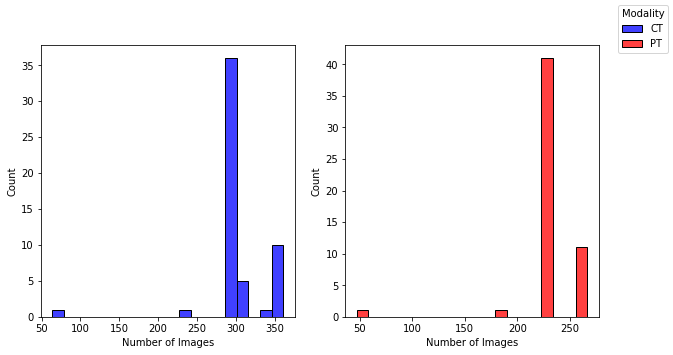

In [80]:
# Check Number of .dcm Files
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(repair_metadata[repair_metadata.Modality=='CT']['Number of Images'],
             color='blue', label='CT', ax=axes[0], bins=20)
sns.histplot(repair_metadata[repair_metadata.Modality=='PT']['Number of Images'],
             color='red', label='PT', ax=axes[1], bins=20)
fig.legend(title='Modality')
plt.show()

In [90]:
# Check Data w/ (Images < 200)
IDEA_IDX = repair_metadata[repair_metadata['Number of Images'] < 200].groupby(['Study UID']).size().index
repair_metadata[repair_metadata['Study UID'].isin(IDEA_IDX)]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
979,1.3.6.1.4.1.9328.50.17.33020888767126589527529...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-3058227149,1.3.6.1.4.1.9328.50.17.28449265003143404680294...,PET CT MID BODY,12-15-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,64,32.12 MB,.\RIDER Lung PET-CT\RIDER-3058227149\12-15-200...,2021-07-08T12:40:14.055
980,1.3.6.1.4.1.9328.50.17.66919382755222070878580...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-3058227149,1.3.6.1.4.1.9328.50.17.28449265003143404680294...,PET CT MID BODY,12-15-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,47,1.60 MB,.\RIDER Lung PET-CT\RIDER-3058227149\12-15-200...,2021-07-08T12:39:13.988
1235,1.3.6.1.4.1.9328.50.17.12050535759964320701126...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-6671960163,1.3.6.1.4.1.9328.50.17.17285866056005085808442...,PET CT MID BODY,10-11-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,236,118.45 MB,.\RIDER Lung PET-CT\RIDER-6671960163\10-11-200...,2021-07-08T17:36:55.879
1237,1.3.6.1.4.1.9328.50.17.28690346454449237108651...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-6671960163,1.3.6.1.4.1.9328.50.17.17285866056005085808442...,PET CT MID BODY,10-11-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,179,6.09 MB,.\RIDER Lung PET-CT\RIDER-6671960163\10-11-200...,2021-07-08T17:31:22.604


In [92]:
# Delete Index
EXCEPT_IDX_2 = repair_metadata[repair_metadata['Study UID'].isin(IDEA_IDX)].index
prefin_metadata = repair_metadata[~repair_metadata.index.isin(EXCEPT_IDX_2)]
prefin_metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
62,1.3.6.1.4.1.9328.50.17.23500193269190786828912...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,290,145.55 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:18:24.46
65,1.3.6.1.4.1.9328.50.17.71370567559995220330016...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.58 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:19:49.764
69,1.3.6.1.4.1.9328.50.17.28880173671501351185240...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,Recon 2 CTAC 2.5 THICK,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,291,146.03 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:30:22.011
71,1.3.6.1.4.1.9328.50.17.10308613002188064065304...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:20:57.592
90,1.3.6.1.4.1.9328.50.17.23846650305435481959640...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1284094278,1.3.6.1.4.1.9328.50.17.22545924354527867084396...,FDG 7 AFOV TORSO,11-24-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,358,179.67 MB,.\RIDER Lung PET-CT\RIDER-1284094278\11-24-200...,2021-07-07T22:50:03.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.9328.50.17.19429515156664107209992...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.26884175944205502857742...,FDG 5AFOV TORSO,06-02-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\06-02-200...,2021-07-08T18:42:24.587
1290,1.3.6.1.4.1.9328.50.17.23927517269629765042831...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,295,148.06 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T19:05:28.415
1293,1.3.6.1.4.1.9328.50.17.16650979549258755223925...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T18:51:02.864
1322,1.3.6.1.4.1.9328.50.17.11527879251296425726955...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,355,178.18 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:42:54.418


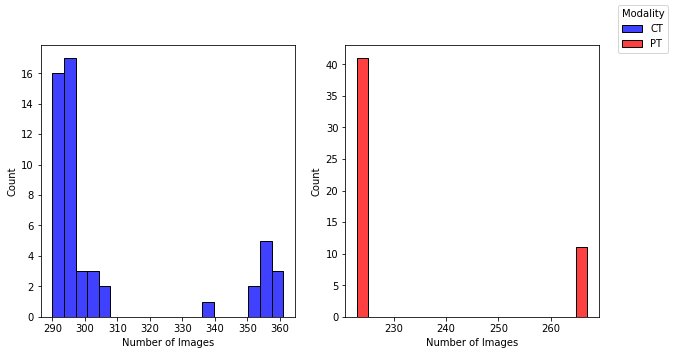

In [93]:
# Check Number of .dcm Files
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(prefin_metadata[prefin_metadata.Modality=='CT']['Number of Images'],
             color='blue', label='CT', ax=axes[0], bins=20)
sns.histplot(prefin_metadata[prefin_metadata.Modality=='PT']['Number of Images'],
             color='red', label='PT', ax=axes[1], bins=20)
fig.legend(title='Modality')
plt.show()

In [94]:
# Save Prefinal Metadata to csv
prefin_metadata.to_csv(DIR_PATH + '/prefin_metadata.csv', na_rep='null')

## 3. Voxel Generation

### 1) Debugging

In [3]:
# Load prefin_metadata if needed
prefin_metadata = pd.read_csv(DIR_PATH + '/prefin_metadata.csv', index_col=0)
prefin_metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
62,1.3.6.1.4.1.9328.50.17.23500193269190786828912...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,290,145.55 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:18:24.46
65,1.3.6.1.4.1.9328.50.17.71370567559995220330016...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.58 MB,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,2021-07-07T22:19:49.764
69,1.3.6.1.4.1.9328.50.17.28880173671501351185240...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,Recon 2 CTAC 2.5 THICK,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,291,146.03 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:30:22.011
71,1.3.6.1.4.1.9328.50.17.10308613002188064065304...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,2021-07-07T22:20:57.592
90,1.3.6.1.4.1.9328.50.17.23846650305435481959640...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-1284094278,1.3.6.1.4.1.9328.50.17.22545924354527867084396...,FDG 7 AFOV TORSO,11-24-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,358,179.67 MB,.\RIDER Lung PET-CT\RIDER-1284094278\11-24-200...,2021-07-07T22:50:03.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.9328.50.17.19429515156664107209992...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.26884175944205502857742...,FDG 5AFOV TORSO,06-02-2005,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\06-02-200...,2021-07-08T18:42:24.587
1290,1.3.6.1.4.1.9328.50.17.23927517269629765042831...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,295,148.06 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T19:05:28.415
1293,1.3.6.1.4.1.9328.50.17.16650979549258755223925...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,PET FDG SUV,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,223,7.59 MB,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,2021-07-08T18:51:02.864
1322,1.3.6.1.4.1.9328.50.17.11527879251296425726955...,RIDER Lung PET-CT,NaN,https://doi.org/10.7937/K9/TCIA.2015.OFIP7TVM,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT 2.5MM STD,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,355,178.18 MB,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,2021-07-08T19:42:54.418


In [4]:
# Debugging before generating voxels

def voxel_debug(df, DIR_PATH): 
    debug_list = []
    for i in tqdm(range(len(df)), desc='Debugging'):
        idx = df.index[i]
        DCM_PATH = DIR_PATH + df.loc[idx,'File Location'][1:]
        for DCM in glob(os.path.join(DCM_PATH, '*.dcm')):
            DCM_DATA = pydicom.dcmread(DCM)
            if '1-' not in os.path.basename(DCM):
                debug_list.append(DCM)
            else:
                try: dummy = DCM_DATA.pixel_array
                except: debug_list.append(DCM)
    return debug_list
 
debug_list = voxel_debug(prefin_metadata, DIR_PATH)

Debugging:   0%|          | 0/104 [00:00<?, ?it/s]

In [5]:
for i, DCM in enumerate(debug_list):
    print ('[{:2d}]'.format(i), os.path.join(*DCM.split(os.path.sep)[3:]))

[ 0] RIDER-1172912404\12-15-2005-FDG 5AFOV TORSO-60805\6.000000-PET FDG SUV-57573\1.2.276.0.7230010.3.1.4.3765360647.2568.1625893976.820.dcm
[ 1] RIDER-1284094278\11-24-2006-FDG 7 AFOV TORSO-61585\6.000000-PET FDG SUV-06196\1.2.276.0.7230010.3.1.4.3765360647.40180.1625830876.836.dcm
[ 2] RIDER-1343746903\05-27-2006-FDG 5AFOV TORSO-70036\6.000000-PET FDG SUV-20467\1.2.276.0.7230010.3.1.4.3765360647.15028.1625831427.260.dcm
[ 3] RIDER-1542248368\01-09-2007-PET CT MID BODY-97982\6.000000-PET FDG SUV-42300\1.2.276.0.7230010.3.1.4.3765360647.26652.1625832044.615.dcm
[ 4] RIDER-2117238498\10-22-2005-PET TUMOR METAB-02377\6.000000-PET FDG SUV-47003\1.2.276.0.7230010.3.1.4.3765360647.31124.1625833597.240.dcm
[ 5] RIDER-2117238498\03-02-2006-FDG 5AFOV TORSO-92609\6.000000-PET FDG SUV-22590\1.2.276.0.7230010.3.1.4.3765360647.37828.1625833604.21.dcm
[ 6] RIDER-2388849043\09-06-2006-e1 FDG 6AFOV TORSO-67859\6.000000-PET FDG SUV-94285\1.2.276.0.7230010.3.1.4.3765360647.18132.1625833590.784.dcm
[ 7]

In [65]:
print ("Files in Debug List are independent of Number of Images.")
print ("Ignore debug_list in voxel generation.")

Files in Debug List are independent of Number of Images.
Ignore debug_list in voxel generation.


### 2) Voxel Generation

In [6]:
def path2voxel(PATH, debug_list):

    FILES = glob(os.path.join(PATH, '*.dcm'))
    for debug in debug_list:
        if debug in FILES: FILES.remove(debug)
    FILES = [pydicom.dcmread(DCM) for DCM in FILES]
    FILES.sort(key = lambda x: int(x.InstanceNumber))

    dsRef = FILES[0]
    dims = (int(dsRef.Rows), int(dsRef.Columns), len(FILES))
    voxel = np.zeros(dims)
    for i, DCM in enumerate(FILES):
        voxel[:,:,i] = DCM.pixel_array

    return voxel, dsRef

In [7]:
def dfref2dict(df, dsRef):

    x = dict()

    # From df
    x['Subject ID'] = df['Subject ID']
    x['Study UID'] = df['Study UID']
    x['Study Description'] = df['Study Description']
    x['Study Date'] = df['Study Date']
    x['Series Description'] = df['Series Description']
    x['Modality'] = df['Modality']
    x['Number of Images'] = df['Number of Images']
    x['File Location'] = df['File Location']

    # From dsRef
    x['Thickness'] = (float(dsRef.PixelSpacing[0]), float(dsRef.PixelSpacing[1]), float(dsRef.SliceThickness))
    
    return x

In [8]:
def voxel_generator(df, DIR_PATH, debug_list, FOLDER='voxel'):

    FOLDER_PATH = os.path.join(DIR_PATH, FOLDER)
    DATA_PATH = os.path.join(FOLDER_PATH, 'data')
    REF_PATH = os.path.join(FOLDER_PATH, 'dcmref')
    if not os.path.exists(FOLDER_PATH): os.mkdir(FOLDER_PATH)
    if not os.path.exists(DATA_PATH): os.mkdir(DATA_PATH)
    if not os.path.exists(REF_PATH): os.mkdir(REF_PATH)

    for i in tqdm(range(len(df)), desc='Generating'):
        
        # Voxel / Reference / Dictionary Generation
        idx = df.index[i]
        DCM_PATH = DIR_PATH + df.loc[idx,'File Location'][1:]
        voxel, dsRef = path2voxel(DCM_PATH, debug_list)
        dic = dfref2dict(df.loc[idx], dsRef)
        mod = dic['Modality']
        FILE_NAME = '{}_{:02d}'.format(mod, i//2)

        # Summary DataFrame Generation
        if i == 0:
            column_list = list(dic.keys())[:-1] + ['File Name']
            final_df = pd.DataFrame(list(dic.values())[:-1] + [FILE_NAME]).T
            final_df.columns = column_list
        else:
            temp_df = pd.DataFrame(list(dic.values())[:-1] + [FILE_NAME]).T
            temp_df.columns = column_list
            final_df = pd.concat([final_df, temp_df], axis=0)
        
        # Save Voxel / Reference
        np.save(os.path.join(DATA_PATH, FILE_NAME), voxel)
        shutil.copy(glob(os.path.join(DCM_PATH, '*.dcm'))[0], os.path.join(REF_PATH, FILE_NAME) + '.dcm')
        
    # Save Summary DataFrame
    final_df.reset_index(drop=True, inplace=True)
    final_df.to_csv(os.path.join(FOLDER_PATH, 'summary.csv'), na_rep='null')

    return final_df

In [9]:
# Voxel Generation
FOLDER = 'voxel'
fin_metadata = voxel_generator(prefin_metadata, DIR_PATH, debug_list, FOLDER=FOLDER)
fin_metadata

Generating:   0%|          | 0/104 [00:00<?, ?it/s]

,Subject ID,Study UID,Study Description,Study Date,Series Description,Modality,Number of Images,File Location,File Name
0,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,CT 2.5MM STD,CT,290,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,CT_00
1,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.24892338155574864998303...,FDG 5AFOV TORSO,12-15-2005,PET FDG SUV,PT,223,.\RIDER Lung PET-CT\RIDER-1172912404\12-15-200...,PT_00
2,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,Recon 2 CTAC 2.5 THICK,CT,291,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,CT_01
3,RIDER-1172912404,1.3.6.1.4.1.9328.50.17.29723960320980340557147...,FDG 5AFOV TORSO,06-14-2005,PET FDG SUV,PT,223,.\RIDER Lung PET-CT\RIDER-1172912404\06-14-200...,PT_01
4,RIDER-1284094278,1.3.6.1.4.1.9328.50.17.22545924354527867084396...,FDG 7 AFOV TORSO,11-24-2006,CT 2.5MM STD,CT,358,.\RIDER Lung PET-CT\RIDER-1284094278\11-24-200...,CT_02
...,...,...,...,...,...,...,...,...,...
99,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.26884175944205502857742...,FDG 5AFOV TORSO,06-02-2005,PET FDG SUV,PT,223,.\RIDER Lung PET-CT\RIDER-8054797922\06-02-200...,PT_49
100,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,CT 2.5MM STD,CT,295,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,CT_50
101,RIDER-8054797922,1.3.6.1.4.1.9328.50.17.72443068618977843685376...,FDG 5AFOV TORSO,01-31-2006,PET FDG SUV,PT,223,.\RIDER Lung PET-CT\RIDER-8054797922\01-31-200...,PT_50
102,RIDER-9640765801,1.3.6.1.4.1.9328.50.17.11844132793672058035829...,FDG 6AFOV TORSO,02-02-2006,CT 2.5MM STD,CT,355,.\RIDER Lung PET-CT\RIDER-9640765801\02-02-200...,CT_51
